In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
base_path = '/kaggle/input/medical-imaging-fetal-colorized-new-dataset-umrict/Fetal Head Abnormalities Classification/Fetal Head Abnormalities Classification/data'

In [4]:
categories = [
    "3D_Rendering",
    "3D_Volume_Rendering",
    "Adaptive_Histogram_Equalization",
    "Alpha_Blending",
    "Basic_Color_Map",
    "Contrast_Stretching",
    "Edge_Detection",
    "Gamma_Correction",
    "Gaussian_Blur",
    "Heatmap_Visualization",
    "Interactive_Segmentation",
    "LUT_Color_Map",
    "Random_Color_Palette"
]

In [50]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [6]:
df.head()

image_path         label
0  /kaggle/input/medical-imaging-fetal-colorized-...  3D_Rendering
1  /kaggle/input/medical-imaging-fetal-colorized-...  3D_Rendering
2  /kaggle/input/medical-imaging-fetal-colorized-...  3D_Rendering
3  /kaggle/input/medical-imaging-fetal-colorized-...  3D_Rendering
4  /kaggle/input/medical-imaging-fetal-colorized-...  3D_Rendering

In [7]:
df.tail()

image_path                 label
12657  /kaggle/input/medical-imaging-fetal-colorized-...  Random_Color_Palette
12658  /kaggle/input/medical-imaging-fetal-colorized-...  Random_Color_Palette
12659  /kaggle/input/medical-imaging-fetal-colorized-...  Random_Color_Palette
12660  /kaggle/input/medical-imaging-fetal-colorized-...  Random_Color_Palette
12661  /kaggle/input/medical-imaging-fetal-colorized-...  Random_Color_Palette

In [8]:
df.shape

(12662, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12662 entries, 0 to 12661
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  12662 non-null  object
 1   label       12662 non-null  object
dtypes: object(2)
memory usage: 198.0+ KB


In [14]:
df['label'].unique()

array(['3D_Rendering', '3D_Volume_Rendering',
       'Adaptive_Histogram_Equalization', 'Alpha_Blending',
       'Basic_Color_Map', 'Contrast_Stretching', 'Edge_Detection',
       'Gamma_Correction', 'Gaussian_Blur', 'Heatmap_Visualization',
       'Interactive_Segmentation', 'LUT_Color_Map',
       'Random_Color_Palette'], dtype=object)

In [15]:
df['label'].value_counts()

label
3D_Rendering                       974
3D_Volume_Rendering                974
Adaptive_Histogram_Equalization    974
Alpha_Blending                     974
Basic_Color_Map                    974
Contrast_Stretching                974
Edge_Detection                     974
Gamma_Correction                   974
Gaussian_Blur                      974
Heatmap_Visualization              974
Interactive_Segmentation           974
LUT_Color_Map                      974
Random_Color_Palette               974
Name: count, dtype: int64

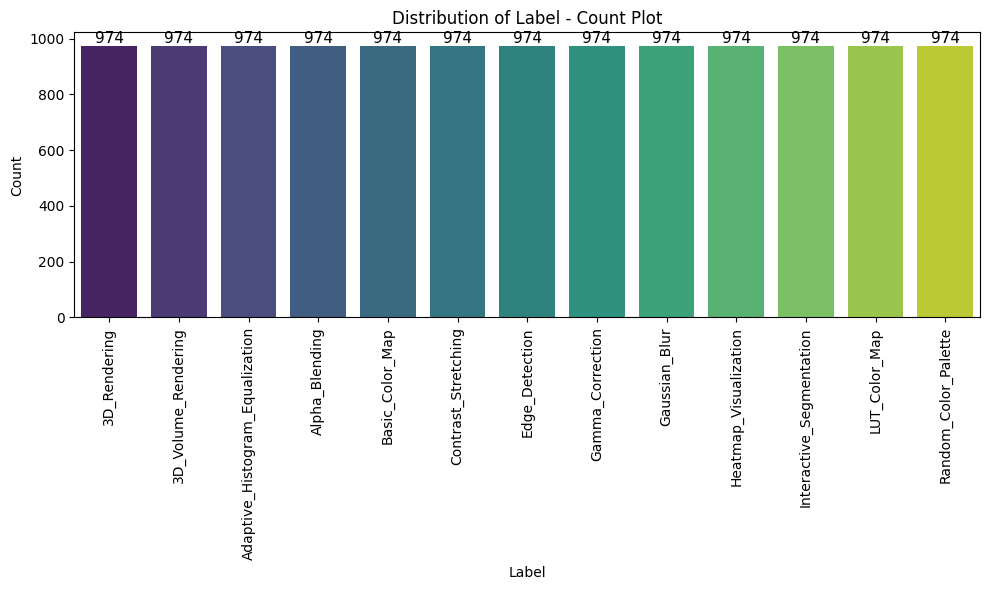

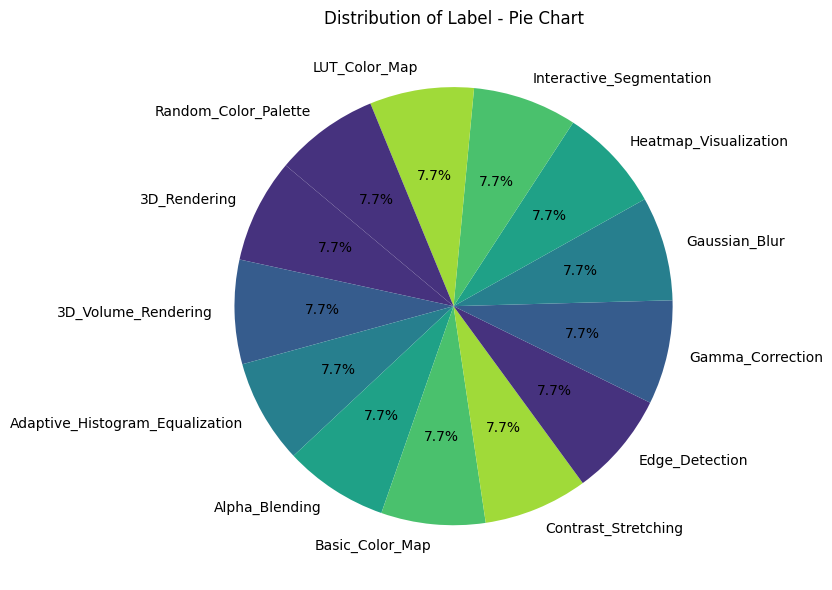

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_label_distribution(df, label_column="label", figsize=(10, 6), palette="viridis"):
    """
    Visualizes the distribution of labels in a DataFrame using count and pie charts.

    Args:
        df (pd.DataFrame): The DataFrame containing the label data.
        label_column (str): The name of the column containing the labels. Defaults to "label".
        figsize (tuple): The figure size for the plots. Defaults to (10, 6).
        palette (str): The color palette to use. Defaults to "viridis".
    """

    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=label_column, palette=palette)
    plt.title(f"Distribution of {label_column.capitalize()} - Count Plot")
    plt.xticks(rotation = 90)
    plt.xlabel(label_column.capitalize())
    plt.ylabel("Count")

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout() 
    plt.show()

   
    label_counts = df[label_column].value_counts()
    plt.figure(figsize=figsize)
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
    plt.title(f"Distribution of {label_column.capitalize()} - Pie Chart")
    plt.tight_layout()
    plt.show()

visualize_label_distribution(df)

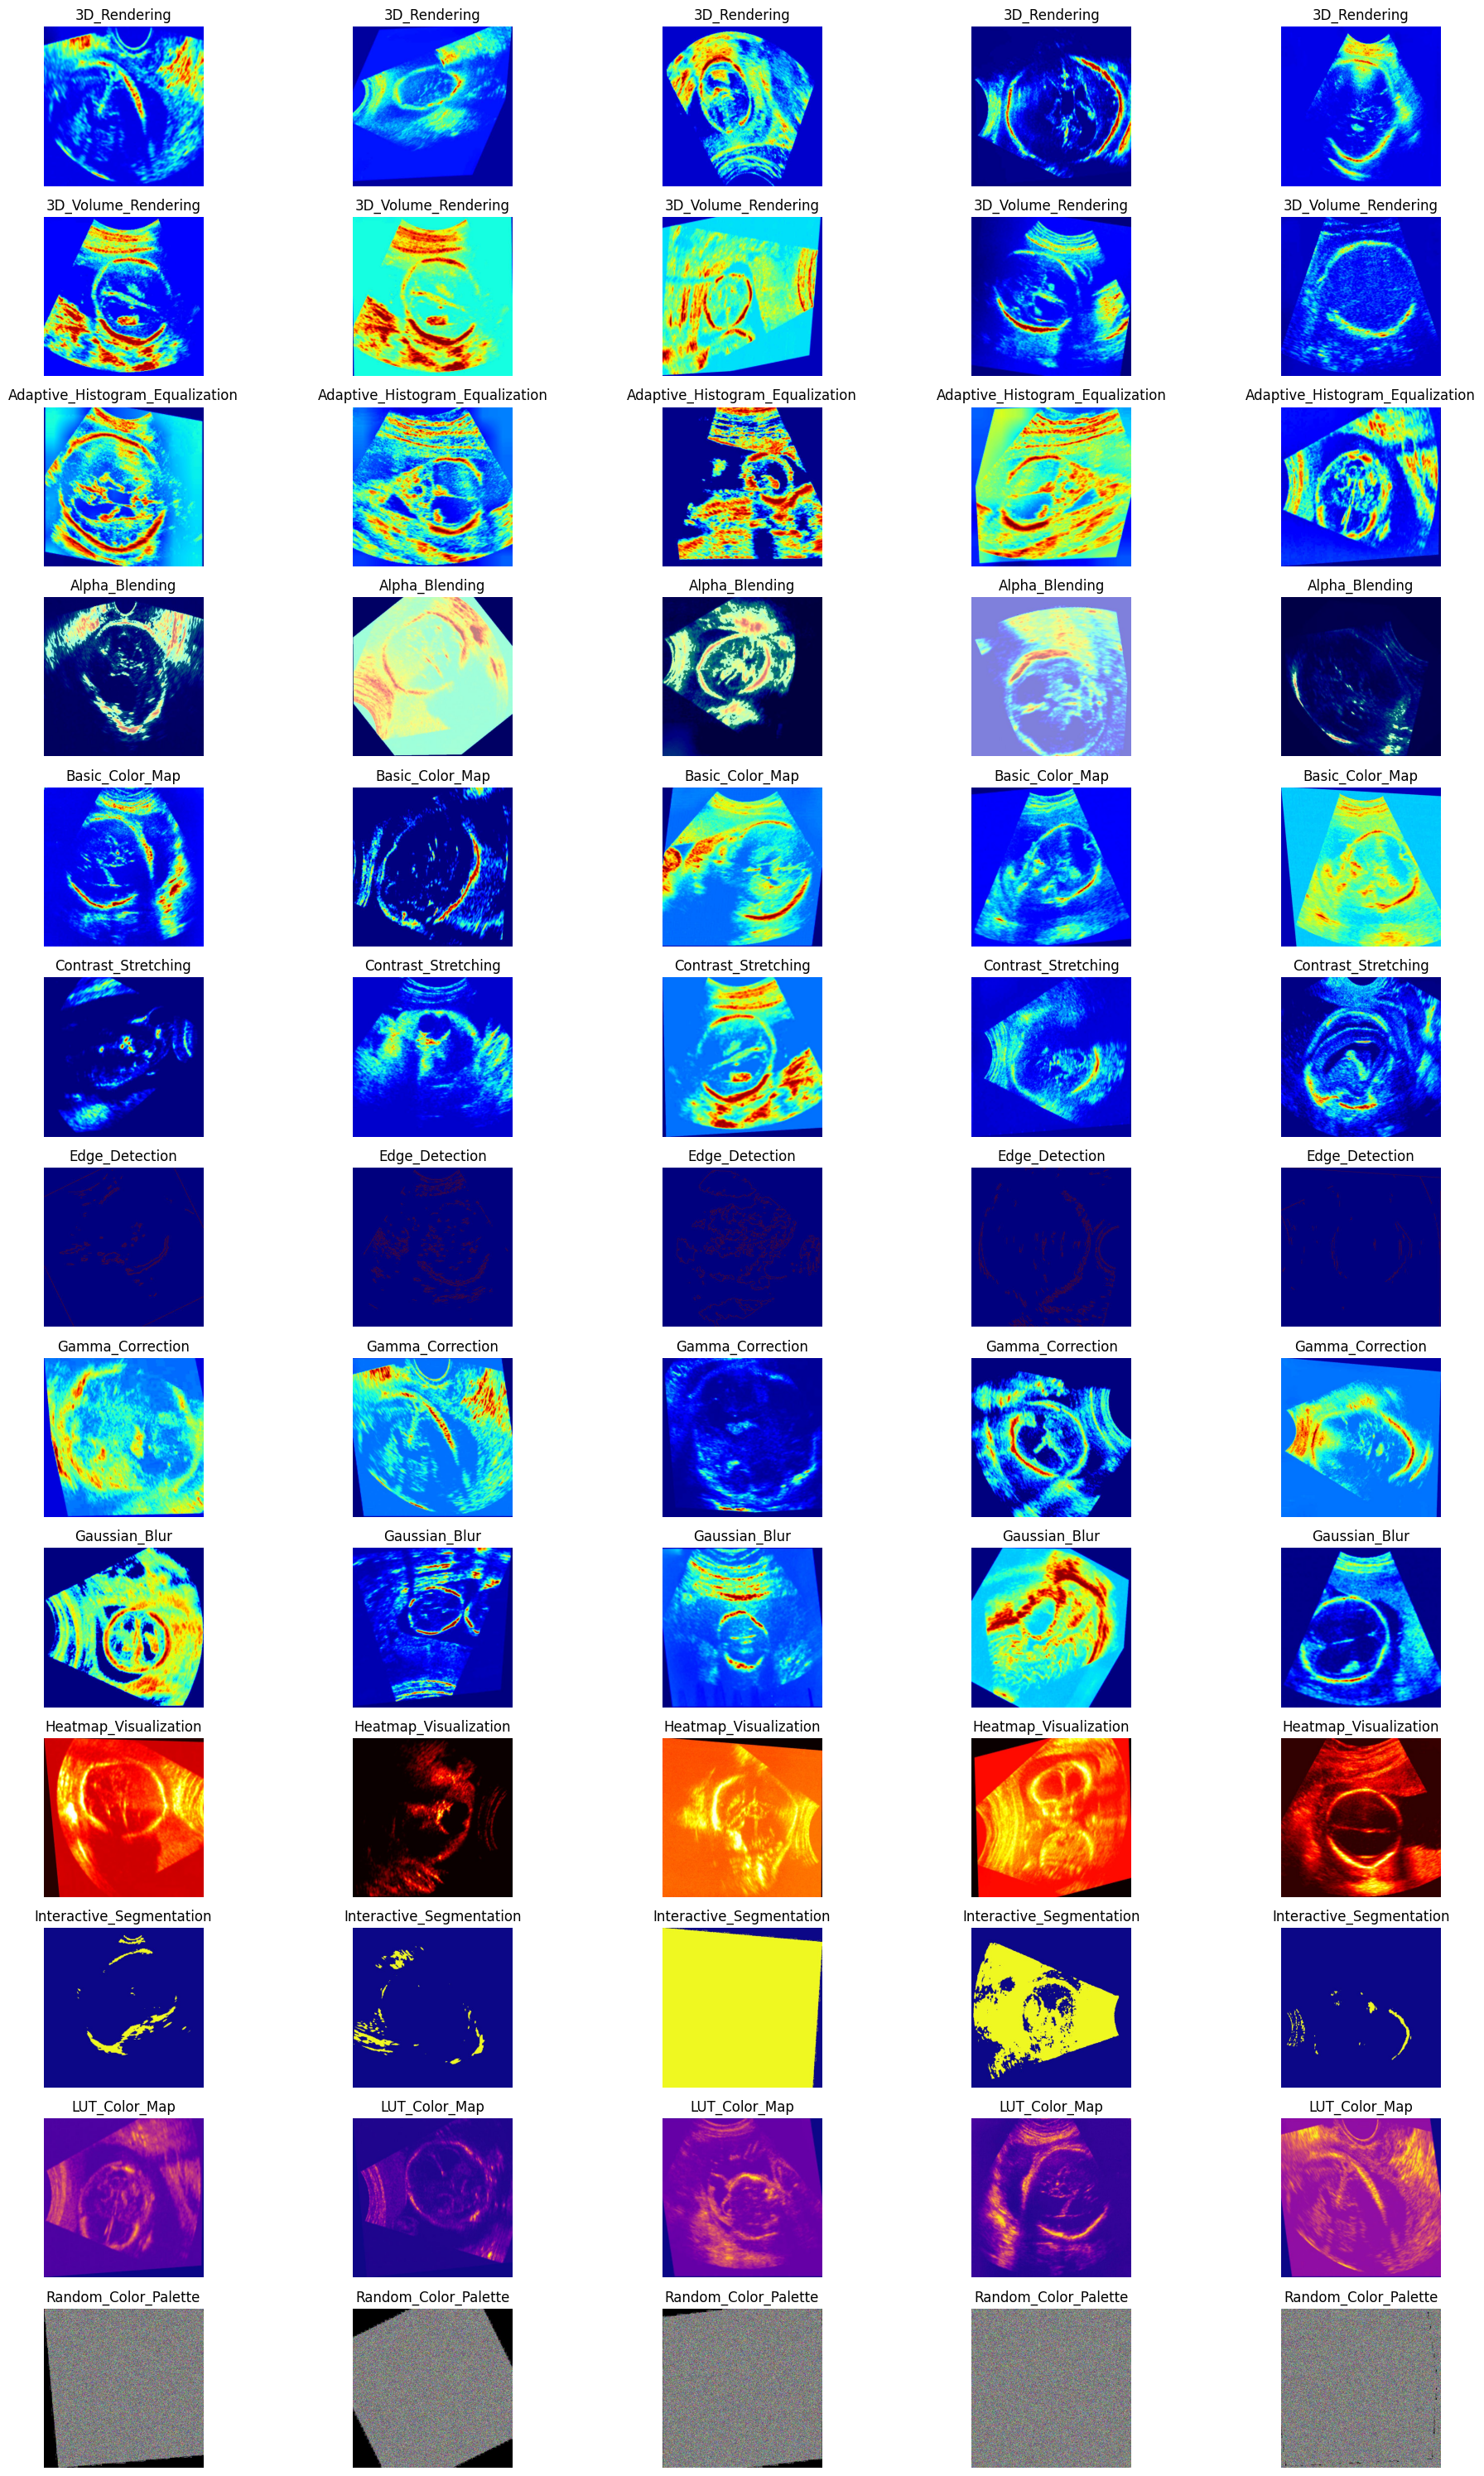

In [17]:
import cv2

num_images = 5

plt.figure(figsize=(20, 30))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [18]:
from PIL import Image

In [19]:
def preprocess_image(img_path, target_size=(64, 64)):
    img = Image.open(img_path).resize(target_size)
    img_array = np.array(img) / 255.0 
    return img_array.flatten() 
X = np.array([preprocess_image(img_path) for img_path in df['image_path']])
print(X.shape) 

(12662, 12288)


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
X_reduced = pca.fit_transform(X)
print(X_reduced.shape)

(12662, 100)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

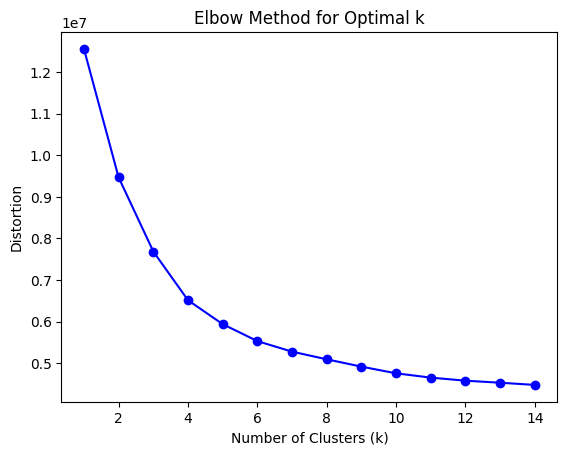

In [21]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 15)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df

image_path  \
0      /kaggle/input/medical-imaging-fetal-colorized-...   
1      /kaggle/input/medical-imaging-fetal-colorized-...   
2      /kaggle/input/medical-imaging-fetal-colorized-...   
3      /kaggle/input/medical-imaging-fetal-colorized-...   
4      /kaggle/input/medical-imaging-fetal-colorized-...   
...                                                  ...   
12657  /kaggle/input/medical-imaging-fetal-colorized-...   
12658  /kaggle/input/medical-imaging-fetal-colorized-...   
12659  /kaggle/input/medical-imaging-fetal-colorized-...   
12660  /kaggle/input/medical-imaging-fetal-colorized-...   
12661  /kaggle/input/medical-imaging-fetal-colorized-...   

                      label  cluster  
0              3D_Rendering        0  
1              3D_Rendering        0  
2              3D_Rendering        0  
3              3D_Rendering        3  
4              3D_Rendering        0  
...                     ...      ...  
12657  Random_Color_Palette        2  
12658  Random_Color_Palette        2  
12659  Random_Color_Palette        2  
12660  Random_Color_Palette        2  
12661  Random_Color_Palette        3  

[12662 rows x 3 columns]

Cluster 0:


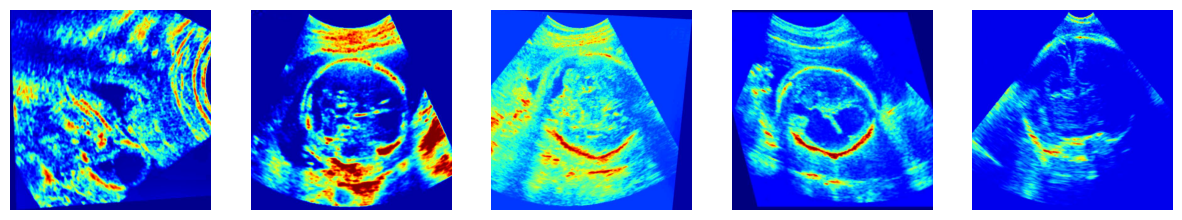

Cluster 1:


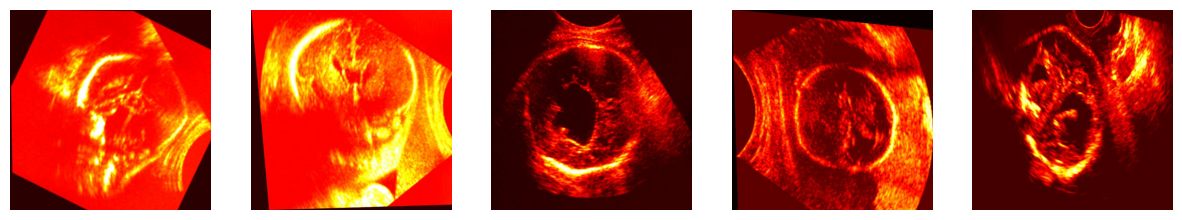

Cluster 2:


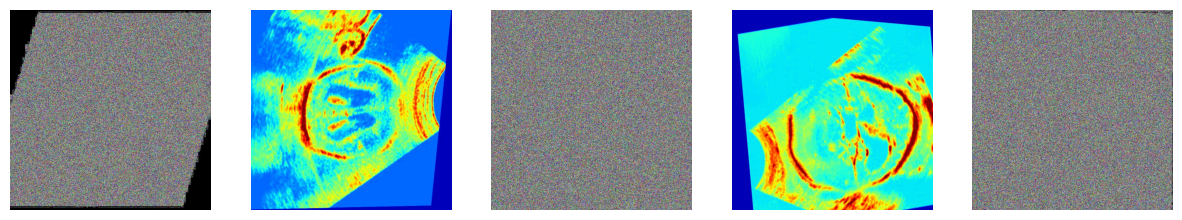

Cluster 3:


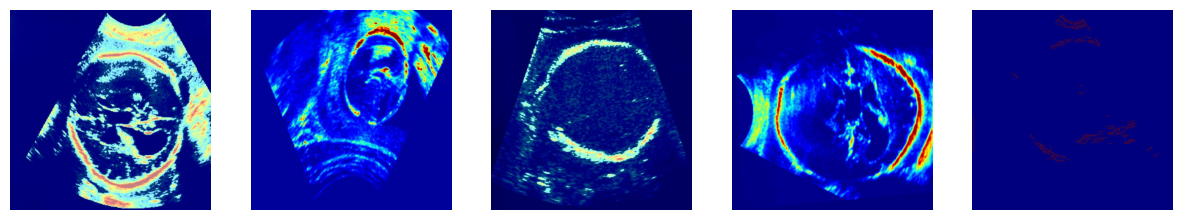

In [24]:
for cluster in range(k):
    print(f"Cluster {cluster}:")
    cluster_samples = df[df['cluster'] == cluster]['image_path'].sample(5, random_state=42)
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(cluster_samples):
        plt.subplot(1, 5, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [25]:
df['cluster'].unique()

array([0, 3, 2, 1], dtype=int32)

In [26]:
df['cluster'].value_counts()

cluster
0    4690
3    4383
2    2617
1     972
Name: count, dtype: int64

In [37]:
df = df[['image_path', 'cluster']]

In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['cluster'])

df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [29]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    4690
3    4690
2    4690
1    4690
Name: count, dtype: int64


In [33]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [52]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [54]:
train_df_new["category_encoded"] = train_df_new["category_encoded"].astype(str)
valid_df_new["category_encoded"] = valid_df_new["category_encoded"].astype(str)
test_df_new["category_encoded"] = test_df_new["category_encoded"].astype(str)


In [55]:
batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 15008 validated image filenames belonging to 4 classes.
Found 1876 validated image filenames belonging to 4 classes.
Found 1876 validated image filenames belonging to 4 classes.


In [42]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [43]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [46]:
from tensorflow.keras import layers, models

In [56]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, 
    BatchNormalization, GaussianNoise, Input, 
    MultiHeadAttention, Reshape, LSTM
)
from tensorflow.keras.optimizers import Adam

def create_mobilenet_lstm_model(input_shape, num_classes=4, learning_rate=0.0001):
    inputs = Input(shape=input_shape, name="Input_Layer")
    
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    base_model.trainable = False  
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
    
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=channels, name="Multi_Head_Attention"
    )(x, x)
    
    attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)

    x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
    x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)

    x = Reshape((1, -1), name="Reshape_for_LSTM")(x)  
    
    x = LSTM(128, return_sequences=False, name="LSTM_Layer")(x) 
    
    outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
    
    model = Model(inputs=inputs, outputs=outputs, name="MobileNet_with_LSTM")
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_lstm_model(input_shape, num_classes=4, learning_rate=0.0001)

cnn_model.summary()

Model: "MobileNet_with_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ Input_Layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 32)   │            128 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1                 │ (None, 112, 112, 32)   │            288 │ conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_bn              │ (None, 112, 112, 32)   │            128 │ conv_dw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_relu (ReLU)     │ (None, 112, 112, 32)   │              0 │ conv_dw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1 (Conv2D)        │ (None, 112, 112, 64)   │          2,048 │ conv_dw_1_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_bn              │ (None, 112, 112, 64)   │            256 │ conv_pw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_relu (ReLU)     │ (None, 112, 112, 64)   │              0 │ conv_pw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pad_2                │ (None, 113, 113, 64)   │              0 │ conv_pw_1_relu[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2                 │ (None, 56, 56, 64)     │            576 │ conv_pad_2[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_bn              │ (None, 56, 56, 64)     │            256 │ conv_dw_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_relu (ReLU)     │ (None, 56, 56, 64)     │              0 │ conv_dw_2_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2 (Conv2D)        │ (None, 56, 56, 128)    │          8,192 │ conv_dw_2_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2_bn              │ (None, 56, 56, 128)    │            512 │ conv_pw_2[0][0]        │
│ (BatchNormalization) 

 Total params: 37,399,748 (142.67 MB)

 Trainable params: 34,170,884 (130.35 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [57]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    batch_size=16,
    verbose=1
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 111ms/step - accuracy: 0.8969 - loss: 0.2725 - val_accuracy: 0.9579 - val_loss: 0.0992
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 108ms/step - accuracy: 0.9673 - loss: 0.0941 - val_accuracy: 0.9574 - val_loss: 0.0989
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 108ms/step - accuracy: 0.9811 - loss: 0.0549 - val_accuracy: 0.9654 - val_loss: 0.1022
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 108ms/step - accuracy: 0.9842 - loss: 0.0465 - val_accuracy: 0.9755 - val_loss: 0.0672
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 108ms/step - accuracy: 0.9935 - loss: 0.0230 - val_accuracy: 0.9787 - val_loss: 0.0615


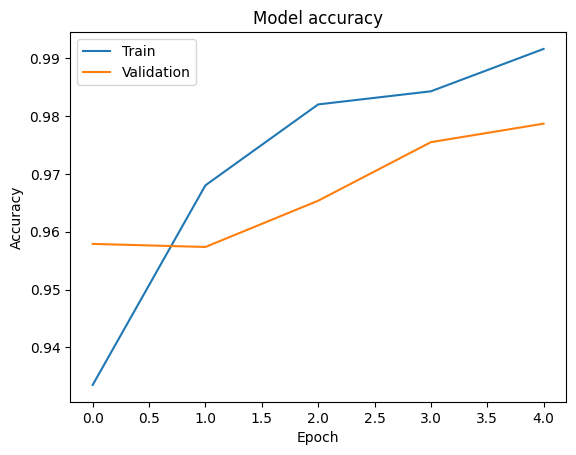

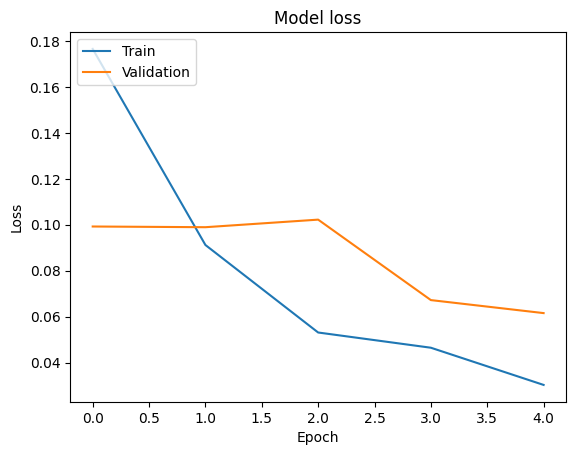

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step


In [60]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       469
           1       1.00      1.00      1.00       469
           2       0.96      0.97      0.96       469
           3       0.98      0.96      0.97       469

    accuracy                           0.97      1876
   macro avg       0.97      0.97      0.97      1876
weighted avg       0.97      0.97      0.97      1876



In [61]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

In [62]:
conf_matrix

array([[451,   0,  14,   4],
       [  0, 469,   0,   0],
       [  7,   1, 456,   5],
       [ 12,   0,   7, 450]])

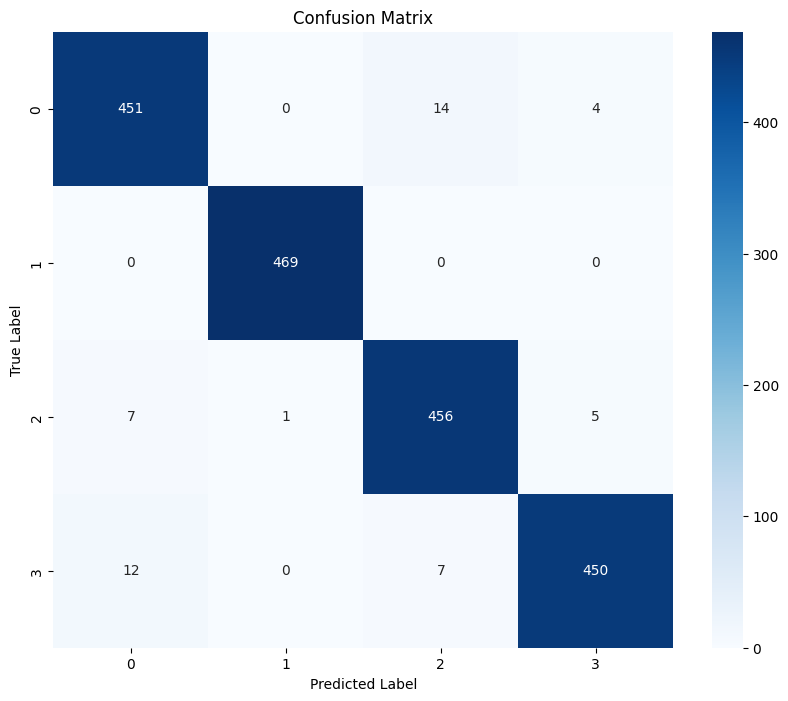

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()